In [43]:
import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [44]:
df = pd.read_csv('https://raw.githubusercontent.com/parandeung/BCWoo/main/TeachforAmerica.csv', index_col = "personid")
df.head(3)

,appyear,gpa,GPA_C,stem,schoolsel,schoolsel_chr,major1,major2,minor,major1group,...,essay2length,essay3length,essayuniquewords,essayssentiment,signupdate,starteddate,appdeadline,submitteddate,attendedevent,completedadm
personid,,,,,,,,,,,,,,,,,,,,,
7,2015-16,3.10,3,0,2.0,less_selective,education (secondary),none,none,education,...,290,295,331,-0.025726,56,56,October,13,0,1
8,2015-16,3.14,3,0,3.0,selective,other,none,none,other,...,212,153,250,0.213712,162,19,August,16,0,1
9,2015-16,3.34,3,0,5.0,most_selective,political science,none,none,social sciences,...,295,289,351,-0.126805,123,9,August,0,1,1


In [45]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 31246 entries, 7 to 37134
Data columns (total 24 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   appyear           31246 non-null  object 
 1   gpa               31246 non-null  float64
 2   GPA_C             31246 non-null  int64  
 3   stem              31246 non-null  int64  
 4   schoolsel         26860 non-null  float64
 5   schoolsel_chr     31246 non-null  object 
 6   major1            31246 non-null  object 
 7   major2            31246 non-null  object 
 8   minor             31246 non-null  object 
 9   major1group       31246 non-null  object 
 10  major2group       31246 non-null  object 
 11  minorgroup        31246 non-null  object 
 12  undergrad_uni     31246 non-null  object 
 13  essay1length      31246 non-null  int64  
 14  essay2length      31246 non-null  int64  
 15  essay3length      31246 non-null  int64  
 16  essayuniquewords  31246 non-null  int64 

In [46]:
df.isnull().sum()

appyear                0
gpa                    0
GPA_C                  0
stem                   0
schoolsel           4386
schoolsel_chr          0
major1                 0
major2                 0
minor                  0
major1group            0
major2group            0
minorgroup             0
undergrad_uni          0
essay1length           0
essay2length           0
essay3length           0
essayuniquewords       0
essayssentiment        0
signupdate             0
starteddate            0
appdeadline            0
submitteddate          0
attendedevent          0
completedadm           0
dtype: int64

# Numeric data select & scaling

In [47]:
df_n = df.select_dtypes(include=['int64','float'])
df_n.columns

Index(['gpa', 'GPA_C', 'stem', 'schoolsel', 'essay1length', 'essay2length',
       'essay3length', 'essayuniquewords', 'essayssentiment', 'signupdate',
       'starteddate', 'submitteddate', 'attendedevent', 'completedadm'],
      dtype='object')

In [48]:
df_n = df.loc[:,['stem','essay1length', 'essay2length',
       'essay3length', 'essayuniquewords', 'essayssentiment', 'signupdate',
       'starteddate', 'submitteddate', 'attendedevent', 'completedadm']]

In [49]:
df_n.head()

,stem,essay1length,essay2length,essay3length,essayuniquewords,essayssentiment,signupdate,starteddate,submitteddate,attendedevent,completedadm
personid,,,,,,,,,,,
7,0,190,290,295,331,-0.025726,56,56,13,0,1
8,0,226,212,153,250,0.213712,162,19,16,0,1
9,0,294,295,289,351,-0.126805,123,9,0,1,1
10,0,297,290,289,419,0.318070,168,21,0,0,1
16,1,297,291,296,374,0.424633,17,17,0,0,1


In [50]:
x_vars = df_n.drop(['completedadm'], axis = 1)
y_vars = df_n['completedadm']

In [51]:
from sklearn.preprocessing import StandardScaler
x_vars_stdscle = StandardScaler().fit_transform(x_vars.values)

In [52]:
df_scaled= pd.DataFrame(x_vars_stdscle, index = x_vars.index, columns=x_vars.columns)
df_scaled.head(2)

,stem,essay1length,essay2length,essay3length,essayuniquewords,essayssentiment,signupdate,starteddate,submitteddate,attendedevent
personid,,,,,,,,,,
7,-0.444497,-0.206146,0.927840,0.978398,0.456605,-0.475639,0.342242,0.693278,0.219846,-0.319429
8,-0.444497,0.186274,0.092024,-0.599600,-0.343872,0.232372,2.487688,-0.317574,0.392420,-0.319429


In [53]:
df_scaled['y'] = df['completedadm']
df_scaled.tail()

,stem,essay1length,essay2length,essay3length,essayuniquewords,essayssentiment,signupdate,starteddate,submitteddate,attendedevent,y
personid,,,,,,,,,,,
37129,-0.444497,0.033667,0.220611,0.022709,0.160132,1.175038,-0.406639,-0.317574,-0.527975,-0.319429,0
37130,-0.444497,-1.710421,-1.633186,-0.799628,-1.549528,0.439869,0.200562,0.502036,2.118161,-0.319429,1
37131,-0.444497,-1.852129,-1.611755,-1.488612,-1.865765,3.325438,-0.426879,-0.344894,0.507470,-0.319429,1
37133,-0.444497,0.491490,0.927840,0.922835,0.812372,-1.519767,0.160082,0.447396,2.175685,-0.319429,1
37134,-0.444497,0.938412,0.959987,0.600568,0.842019,0.365119,2.325767,3.370671,-0.182827,-0.319429,1


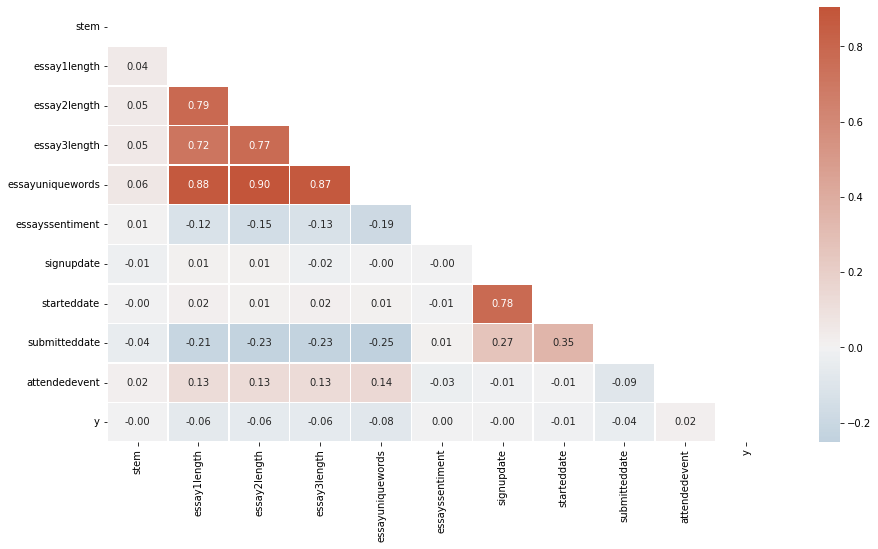

In [54]:
import seaborn as sns
import matplotlib.pyplot as plt
df_corr=df_scaled.corr()
plt.figure(figsize = (15,8))
sns.heatmap(df_corr, annot=True, fmt=".2f",
            mask=np.triu(np.ones_like(df_corr, dtype=bool)),
            cbar=True, cmap=sns.diverging_palette(240, 20, as_cmap=True),
            center=0, linewidths=0.5)

In [55]:
import statsmodels.api as sm
lr = sm.Logit(df_scaled.y, df_scaled.drop(['y'], axis = 1))
lr.fit().summary()

Optimization terminated successfully.
         Current function value: 0.689376
         Iterations 4


<class 'statsmodels.iolib.summary.Summary'>
"""
                           Logit Regression Results                           
==============================================================================
Dep. Variable:                      y   No. Observations:                31246
Model:                          Logit   Df Residuals:                    31236
Method:                           MLE   Df Model:                            9
Date:                Fri, 13 May 2022   Pseudo R-squ.:                 -0.3842
Time:                        21:54:48   Log-Likelihood:                -21540.
converged:                       True   LL-Null:                       -15562.
Covariance Type:            nonrobust   LLR p-value:                     1.000
====================================================================================
                       coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------------
stem                 0.0038      0.011      0.337      0.736      -0.018       0.026
essay1length         0.0672      0.025      2.700      0.007       0.018       0.116
essay2length         0.0968      0.027      3.596      0.000       0.044       0.149
essay3length         0.0873      0.024      3.574      0.000       0.039       0.135
essayuniquewords    -0.3842      0.046     -8.331      0.000      -0.475      -0.294
essayssentiment     -0.0326      0.012     -2.784      0.005      -0.056      -0.010
signupdate           0.0250      0.018      1.378      0.168      -0.011       0.061
starteddate          0.0012      0.019      0.064      0.949      -0.036       0.038
submitteddate       -0.1057      0.013     -8.180      0.000      -0.131      -0.080
attendedevent        0.0377      0.011      3.280      0.001       0.015       0.060
====================================================================================
"""

In [56]:
df_corr['y'].abs().sort_values(ascending=False)

y                   1.000000
essayuniquewords    0.076540
essay1length        0.062380
essay2length        0.059367
essay3length        0.057708
submitteddate       0.038729
attendedevent       0.015418
starteddate         0.011011
essayssentiment     0.001649
stem                0.000817
signupdate          0.000663
Name: y, dtype: float64

# Object data select & encoding to categorical data

In [57]:
df_c = df.select_dtypes(include='object')
df_c.columns

Index(['appyear', 'schoolsel_chr', 'major1', 'major2', 'minor', 'major1group',
       'major2group', 'minorgroup', 'undergrad_uni', 'appdeadline'],
      dtype='object')

In [58]:
for i in ['schoolsel_chr', 'major1', 'major2', 'minor', 'major1group',
       'major2group', 'minorgroup', 'undergrad_uni', 'appdeadline','GPA_C','completedadm']:
       df_c[i] = df[i].astype('category')

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  This is separate from the ipykernel package so we can avoid doing imports until


In [59]:
cols = ['schoolsel_chr', 'major1', 'major2', 'minor', 'major1group',
       'major2group', 'minorgroup', 'undergrad_uni', 'appdeadline','GPA_C','completedadm']

In [60]:
from sklearn.preprocessing import LabelEncoder
lb = LabelEncoder()
for i in df_c[cols]:
    df_c[i] = lb.fit_transform(df_c[i])
df_c

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  after removing the cwd from sys.path.


,appyear,schoolsel_chr,major1,major2,minor,major1group,major2group,minorgroup,undergrad_uni,appdeadline,GPA_C,completedadm
personid,,,,,,,,,,,,
7,2015-16,1,10,20,20,1,3,3,1,3,2,1
8,2015-16,4,20,20,20,3,3,3,1,0,2,1
9,2015-16,3,22,20,20,4,3,3,1,0,2,1
10,2015-16,3,24,7,9,4,5,1,17,0,1,1
16,2015-16,2,20,20,20,3,3,3,1,3,2,1
...,...,...,...,...,...,...,...,...,...,...,...,...
37129,2015-16,3,14,20,20,2,3,3,1,2,2,0
37130,2015-16,0,20,20,20,3,3,3,18,1,2,1
37131,2015-16,1,20,20,24,3,3,5,1,2,1,1


In [61]:
df_c=df_c.drop('appyear',axis=1)
df_c.head()

,schoolsel_chr,major1,major2,minor,major1group,major2group,minorgroup,undergrad_uni,appdeadline,GPA_C,completedadm
personid,,,,,,,,,,,
7,1,10,20,20,1,3,3,1,3,2,1
8,4,20,20,20,3,3,3,1,0,2,1
9,3,22,20,20,4,3,3,1,0,2,1
10,3,24,7,9,4,5,1,17,0,1,1
16,2,20,20,20,3,3,3,1,3,2,1


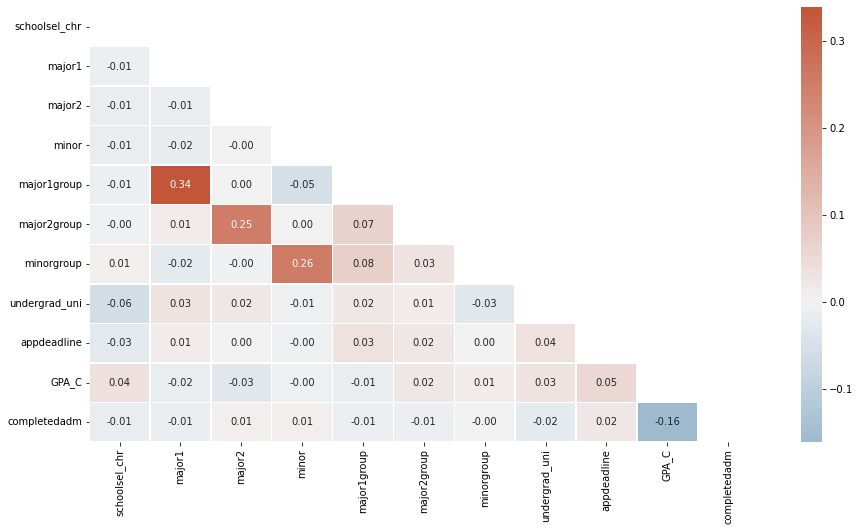

In [62]:
import seaborn as sns
import matplotlib.pyplot as plt
df_corr_1=df_c.corr()
plt.figure(figsize = (15,8))
sns.heatmap(df_corr_1, annot=True, fmt=".2f",
            mask=np.triu(np.ones_like(df_corr_1, dtype=bool)),
            cbar=True, cmap=sns.diverging_palette(240, 20, as_cmap=True),
            center=0, linewidths=0.5)

In [63]:
df_corr_1['completedadm'].abs().sort_values(ascending=False)

completedadm     1.000000
GPA_C            0.160771
undergrad_uni    0.021938
appdeadline      0.021516
schoolsel_chr    0.013846
major1           0.011187
major2group      0.010121
major1group      0.007319
minor            0.007209
major2           0.006339
minorgroup       0.002654
Name: completedadm, dtype: float64

In [64]:
df_c.dtypes

schoolsel_chr    int64
major1           int64
major2           int64
minor            int64
major1group      int64
major2group      int64
minorgroup       int64
undergrad_uni    int64
appdeadline      int64
GPA_C            int64
completedadm     int64
dtype: object

In [65]:
import statsmodels.api as sm
lr_1 = sm.Logit(df_c.completedadm, df_c.drop(['completedadm'], axis = 1))
lr_1.fit().summary()

Optimization terminated successfully.
         Current function value: 0.492023
         Iterations 6


<class 'statsmodels.iolib.summary.Summary'>
"""
                           Logit Regression Results                           
==============================================================================
Dep. Variable:           completedadm   No. Observations:                31246
Model:                          Logit   Df Residuals:                    31236
Method:                           MLE   Df Model:                            9
Date:                Fri, 13 May 2022   Pseudo R-squ.:                 0.01207
Time:                        21:54:50   Log-Likelihood:                -15374.
converged:                       True   LL-Null:                       -15562.
Covariance Type:            nonrobust   LLR p-value:                 2.206e-75
=================================================================================
                    coef    std err          z      P>|z|      [0.025      0.975]
---------------------------------------------------------------------------------
schoolsel_chr     0.0386      0.010      3.997      0.000       0.020       0.058
major1            0.0062      0.002      2.974      0.003       0.002       0.010
major2            0.0533      0.003     15.999      0.000       0.047       0.060
minor             0.0278      0.003     10.578      0.000       0.023       0.033
major1group       0.0217      0.011      2.005      0.045       0.000       0.043
major2group       0.0842      0.018      4.807      0.000       0.050       0.118
minorgroup        0.0543      0.013      4.223      0.000       0.029       0.079
undergrad_uni    -0.0066      0.003     -2.384      0.017      -0.012      -0.001
appdeadline       0.1139      0.012      9.343      0.000       0.090       0.138
GPA_C            -0.6171      0.029    -21.037      0.000      -0.675      -0.560
=================================================================================
"""

In [66]:
df_n2=df_n.drop('completedadm',axis=1)

#Concat Numeric & categorical data

In [67]:
df_all = pd.concat([df_n2,df_c], axis = 1)
df_all.head()

,stem,essay1length,essay2length,essay3length,essayuniquewords,essayssentiment,signupdate,starteddate,submitteddate,attendedevent,...,major1,major2,minor,major1group,major2group,minorgroup,undergrad_uni,appdeadline,GPA_C,completedadm
personid,,,,,,,,,,,,,,,,,,,,,
7,0,190,290,295,331,-0.025726,56,56,13,0,...,10,20,20,1,3,3,1,3,2,1
8,0,226,212,153,250,0.213712,162,19,16,0,...,20,20,20,3,3,3,1,0,2,1
9,0,294,295,289,351,-0.126805,123,9,0,1,...,22,20,20,4,3,3,1,0,2,1
10,0,297,290,289,419,0.318070,168,21,0,0,...,24,7,9,4,5,1,17,0,1,1
16,1,297,291,296,374,0.424633,17,17,0,0,...,20,20,20,3,3,3,1,3,2,1


In [68]:
df_all.columns

Index(['stem', 'essay1length', 'essay2length', 'essay3length',
       'essayuniquewords', 'essayssentiment', 'signupdate', 'starteddate',
       'submitteddate', 'attendedevent', 'schoolsel_chr', 'major1', 'major2',
       'minor', 'major1group', 'major2group', 'minorgroup', 'undergrad_uni',
       'appdeadline', 'GPA_C', 'completedadm'],
      dtype='object')

In [69]:
df_corr_2=df_all.corr()
df_corr_2['completedadm'].abs().sort_values(ascending=False)

completedadm        1.000000
GPA_C               0.160771
essayuniquewords    0.076540
essay1length        0.062380
essay2length        0.059367
essay3length        0.057708
submitteddate       0.038729
undergrad_uni       0.021938
appdeadline         0.021516
attendedevent       0.015418
schoolsel_chr       0.013846
major1              0.011187
starteddate         0.011011
major2group         0.010121
major1group         0.007319
minor               0.007209
major2              0.006339
minorgroup          0.002654
essayssentiment     0.001649
stem                0.000817
signupdate          0.000663
Name: completedadm, dtype: float64

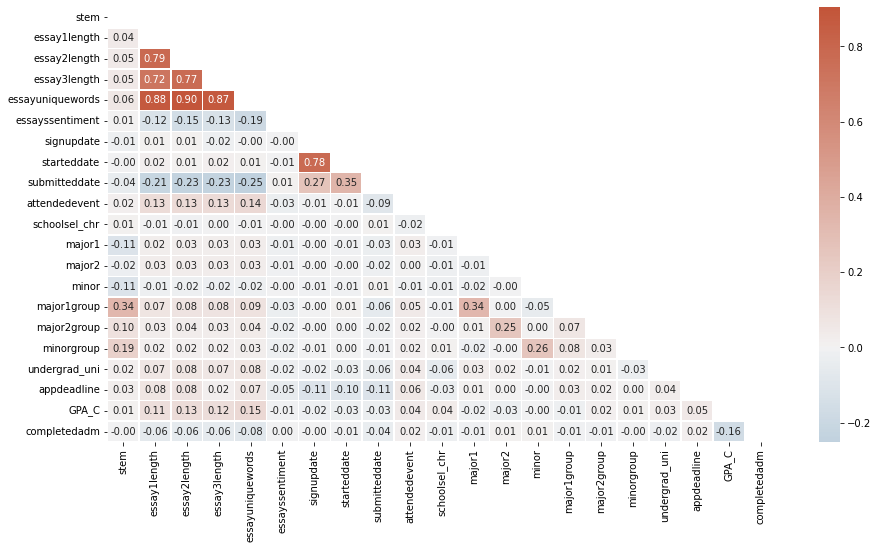

In [70]:
import seaborn as sns
import matplotlib.pyplot as plt
df_corr_2=df_all.corr()
plt.figure(figsize = (15,8))
sns.heatmap(df_corr_2, annot=True, fmt=".2f",
            mask=np.triu(np.ones_like(df_corr_2, dtype=bool)),
            cbar=True, cmap=sns.diverging_palette(240, 20, as_cmap=True),
            center=0, linewidths=0.5)

In [71]:
import statsmodels.api as sm
lr_2 = sm.Logit(df_all.completedadm, df_all.drop(['completedadm'], axis = 1))
lr_2.fit().summary()

Optimization terminated successfully.
         Current function value: 0.490351
         Iterations 6


<class 'statsmodels.iolib.summary.Summary'>
"""
                           Logit Regression Results                           
==============================================================================
Dep. Variable:           completedadm   No. Observations:                31246
Model:                          Logit   Df Residuals:                    31226
Method:                           MLE   Df Model:                           19
Date:                Fri, 13 May 2022   Pseudo R-squ.:                 0.01542
Time:                        21:54:51   Log-Likelihood:                -15322.
converged:                       True   LL-Null:                       -15562.
Covariance Type:            nonrobust   LLR p-value:                 8.518e-90
====================================================================================
                       coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------------
stem                 0.0307      0.044      0.695      0.487      -0.056       0.117
essay1length      6.898e-06      0.000      0.020      0.984      -0.001       0.001
essay2length         0.0003      0.000      0.895      0.371      -0.000       0.001
essay3length         0.0009      0.000      2.631      0.009       0.000       0.002
essayuniquewords    -0.0019      0.001     -3.419      0.001      -0.003      -0.001
essayssentiment      0.0400      0.044      0.918      0.359      -0.045       0.125
signupdate           0.0018      0.000      3.541      0.000       0.001       0.003
starteddate         -0.0004      0.001     -0.629      0.529      -0.002       0.001
submitteddate       -0.0053      0.001     -6.148      0.000      -0.007      -0.004
attendedevent        0.2076      0.052      3.980      0.000       0.105       0.310
schoolsel_chr        0.0434      0.010      4.460      0.000       0.024       0.062
major1               0.0071      0.002      3.300      0.001       0.003       0.011
major2               0.0572      0.003     16.805      0.000       0.051       0.064
minor                0.0299      0.003     11.131      0.000       0.025       0.035
major1group          0.0220      0.012      1.857      0.063      -0.001       0.045
major2group          0.0916      0.018      5.178      0.000       0.057       0.126
minorgroup           0.0575      0.013      4.351      0.000       0.032       0.083
undergrad_uni       -0.0063      0.003     -2.267      0.023      -0.012      -0.001
appdeadline          0.1196      0.012      9.639      0.000       0.095       0.144
GPA_C               -0.5738      0.030    -18.836      0.000      -0.634      -0.514
====================================================================================
"""

exclude p-value > 0.05
since major1,2,minor are highly related to each group, I choose group only

In [72]:
significant_cols = ['stem','essay3length','essayuniquewords',
                    'signupdate','submitteddate','attendedevent','schoolsel_chr',
                    'major1group','major2group','minorgroup','undergrad_uni',
                    'appdeadline','GPA_C']
lr_3 = sm.Logit(df_all.completedadm, df_all[significant_cols])
lr_3.fit().summary()

Optimization terminated successfully.
         Current function value: 0.498311
         Iterations 6


<class 'statsmodels.iolib.summary.Summary'>
"""
                           Logit Regression Results                           
==============================================================================
Dep. Variable:           completedadm   No. Observations:                31246
Model:                          Logit   Df Residuals:                    31233
Method:                           MLE   Df Model:                           12
Date:                Fri, 13 May 2022   Pseudo R-squ.:              -0.0005575
Time:                        21:54:52   Log-Likelihood:                -15570.
converged:                       True   LL-Null:                       -15562.
Covariance Type:            nonrobust   LLR p-value:                     1.000
====================================================================================
                       coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------------
stem                -0.1682      0.041     -4.074      0.000      -0.249      -0.087
essay3length         0.0008      0.000      2.521      0.012       0.000       0.001
essayuniquewords    -0.0010      0.000     -3.385      0.001      -0.002      -0.000
signupdate           0.0019      0.000      5.833      0.000       0.001       0.002
submitteddate       -0.0038      0.001     -4.575      0.000      -0.005      -0.002
attendedevent        0.1736      0.052      3.342      0.001       0.072       0.275
schoolsel_chr        0.0735      0.009      7.770      0.000       0.055       0.092
major1group          0.0653      0.010      6.232      0.000       0.045       0.086
major2group          0.2993      0.016     18.779      0.000       0.268       0.331
minorgroup           0.1658      0.012     13.632      0.000       0.142       0.190
undergrad_uni       -0.0028      0.003     -1.019      0.308      -0.008       0.003
appdeadline          0.1501      0.012     12.340      0.000       0.126       0.174
GPA_C               -0.3831      0.028    -13.693      0.000      -0.438      -0.328
====================================================================================
"""

In [73]:
result = lr_3.fit()

Optimization terminated successfully.
         Current function value: 0.498311
         Iterations 6


Odds Ration & predict

In [74]:
#Odds ratio
np.exp(result.params)

stem                0.845183
essay3length        1.000817
essayuniquewords    0.999025
signupdate          1.001855
submitteddate       0.996212
attendedevent       1.189548
schoolsel_chr       1.076250
major1group         1.067431
major2group         1.348961
minorgroup          1.180376
undergrad_uni       0.997157
appdeadline         1.161929
GPA_C               0.681767
dtype: float64

In [75]:
df_all['predict']=result.predict(df_all[significant_cols])
df_all.head()

,stem,essay1length,essay2length,essay3length,essayuniquewords,essayssentiment,signupdate,starteddate,submitteddate,attendedevent,...,major2,minor,major1group,major2group,minorgroup,undergrad_uni,appdeadline,GPA_C,completedadm,predict
personid,,,,,,,,,,,,,,,,,,,,,
7,0,190,290,295,331,-0.025726,56,56,13,0,...,20,20,1,3,3,1,3,2,1,0.766398
8,0,226,212,153,250,0.213712,162,19,16,0,...,20,20,3,3,3,1,0,2,1,0.775026
9,0,294,295,289,351,-0.126805,123,9,0,1,...,20,20,4,3,3,1,0,2,1,0.802700
10,0,297,290,289,419,0.318070,168,21,0,0,...,7,9,4,5,1,17,0,1,1,0.864280
16,1,297,291,296,374,0.424633,17,17,0,0,...,20,20,3,3,3,1,3,2,1,0.761297


#Evaluation

In [ ]:
y = df_all.completedadm
X = df_all[significant_cols]

In [ ]:
from sklearn.model_selection import train_test_split, cross_validate
from sklearn.linear_model import LogisticRegression
from sklearn import metrics
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=0)
logreg = LogisticRegression()
logreg.fit(X_train, y_train)

/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_logistic.py:818: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG,


LogisticRegression()

In [ ]:
y_pred = logreg.predict(X_test)
print('Accuracy of logistic regression classifier on test set: {:.2f}'.format(logreg.score(X_test, y_test)))

Accuracy of logistic regression classifier on test set: 0.80


In [ ]:
from sklearn.metrics import confusion_matrix
confusion_matrix = confusion_matrix(y_test, y_pred)
print(confusion_matrix)

[[  11 1860]
 [  24 7479]]


In [ ]:
from sklearn.metrics import classification_report
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.31      0.01      0.01      1871
           1       0.80      1.00      0.89      7503

    accuracy                           0.80      9374
   macro avg       0.56      0.50      0.45      9374
weighted avg       0.70      0.80      0.71      9374



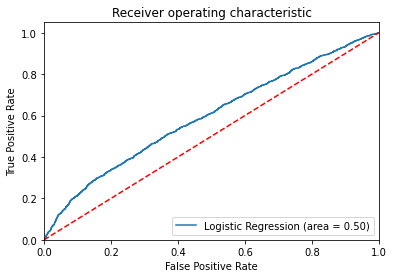

In [ ]:
from sklearn.metrics import roc_auc_score
from sklearn.metrics import roc_curve
logit_roc_auc = roc_auc_score(y_test, logreg.predict(X_test))
fpr, tpr, thresholds = roc_curve(y_test, logreg.predict_proba(X_test)[:,1])
plt.figure()
plt.plot(fpr, tpr, label='Logistic Regression (area = %0.2f)' % logit_roc_auc)
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic')
plt.legend(loc="lower right")
plt.savefig('Log_ROC')
plt.show()